In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
x_length = 0.15
dx = 0.01
n_x = int(x_length / dx) + 1
x = np.linspace(0, x_length, n_x, endpoint=True)

y_length = 0.1
dy = 0.01
n_y = int(y_length / dy) + 1
y = np.linspace(0, y_length, n_y, endpoint=True)

t_length = 100.
dt = 0.05
n_t = int(t_length / dt)
# Constants
alpha = 1e-5
# Initial/Boundary conditions
T_all_init = 100
T_source = 0

In [3]:
T_new = np.ones(shape=(n_x, n_y)) * T_all_init
Ts = [T_new]

for i_t in range(n_t):
    T_new = np.zeros(shape=(n_x, n_y))
    d2T_dx2 = (Ts[i_t][2:,1:-1] - 2 * Ts[i_t][1:-1,1:-1] + Ts[i_t][:-2,1:-1]) / dx**2
    d2T_dy2 = (Ts[i_t][1:-1,2:] - 2 * Ts[i_t][1:-1,1:-1] + Ts[i_t][1:-1,:-2]) / dy**2
    T_new[1:-1,1:-1] = Ts[i_t][1:-1,1:-1] + alpha * dt * (d2T_dx2 + d2T_dy2)
    # Boundary conditions
    T_new[0,:] = T_source
    T_new[:,0] = T_source
    T_new[-1,:] = T_new[-2,:]
    T_new[:,-1] = T_new[:,-2]
    Ts.append(T_new)

del Ts[0]

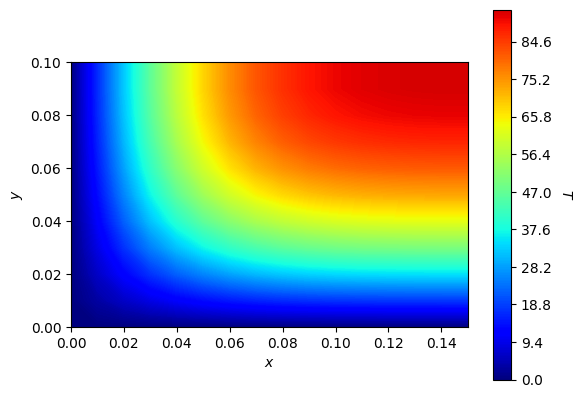

In [4]:
time_step = n_t - 1

fig, ax = plt.subplots(dpi=100)

cs = ax.contourf(x, y, Ts[time_step].T, 500, cmap=cm.jet, vmin=0, vmax=100)
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('$T$', rotation=270, labelpad=15)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

fig.savefig('out-square.jpg', dpi=150, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(dpi=100)

def animate(i):
    ax.clear()
    cs = ax.contourf(x, y, Ts[i].T, 500, cmap=cm.jet, vmin=0, vmax=T_all_init)
    ax.set_aspect('equal', adjustable='box')
    if len(fig.axes) == 1:
        cbar = fig.colorbar(cs)
        cbar.ax.set_ylabel('$T$', rotation=270, labelpad=15)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
anim = FuncAnimation(fig, animate, frames=1000, interval=100, repeat=False)
anim.save('out-square.gif', writer=PillowWriter(fps=100), dpi=100)